# Import Packages

In [1]:
# Import Libraries
import warnings; warnings.filterwarnings('ignore')
from nilmtk import DataSet
import matplotlib.pyplot as plt
from nilmtk.datastore import HDFDataStore
import pickle
import tables
import numpy as np
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

# Train & Val

In [3]:
# Import Data

train_redd = DataSet('redd.h5')

In [4]:
# Select Building

train_elec1 = train_redd.buildings[1].elec
train_elec3 = train_redd.buildings[3].elec
train_elec4 = train_redd.buildings[4].elec

In [5]:
# Building 1 for each load appliance

cols = ['fridge', 'sockets', 'light', 'microwave']
indices = [5, 7, 9, 11]
counter = 0

df1 = []

for counter in range(len(cols)):
    df = next(train_elec1.select(instance = indices[counter]).load())
    df.columns = [cols[counter]]
    df.dropna()
    df1.append(df)

df_fin = df1[0]

for df in df1[1:]:
    df_fin = df_fin.merge(df, how = 'inner', left_index = True, right_index = True)

Loading data for meter ElecMeterID(instance=5, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=9, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


In [10]:
temp_index = df_fin.index

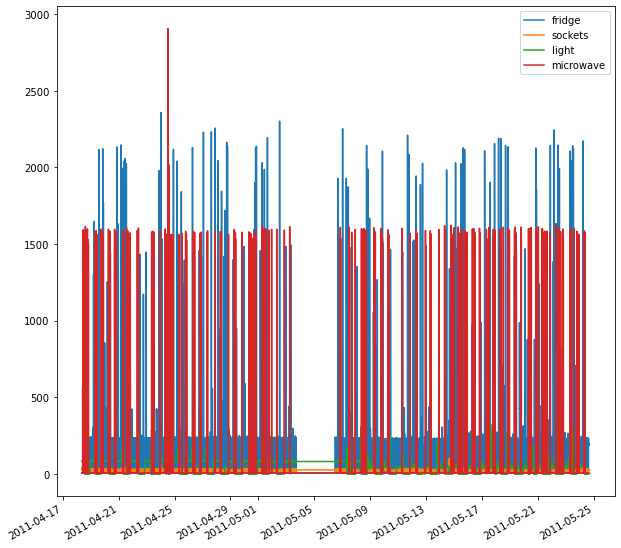

In [12]:
df_fin.plot()

In [6]:
# Extract Air Con from Building 4

air_con = next(train_elec4.meters[-1].load())

air_con.columns = ['Air Conditioner']

# air_con.plot()

Loading data for meter ElecMeterID(instance=10, building=4, dataset='REDD')     
Done loading data all meters for this chunk.


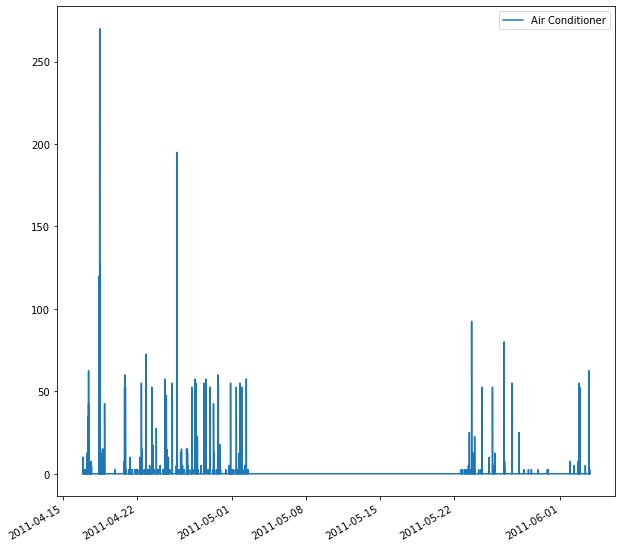

In [7]:
air_con.plot()

In [113]:
air_con

,Air Conditioner
2011-04-16 21:16:30-04:00,0.0
2011-04-16 21:16:33-04:00,0.0
2011-04-16 21:16:36-04:00,0.0
2011-04-16 21:16:39-04:00,0.0
2011-04-16 21:16:42-04:00,0.0
...,...
2011-06-03 20:45:24-04:00,0.0
2011-06-03 20:45:27-04:00,0.0
2011-06-03 20:45:30-04:00,0.0
2011-06-03 20:45:33-04:00,0.0


In [114]:
df_fin

,fridge,sockets,light,microwave,Air Conditioner,ALL
2011-04-18 09:22:12-04:00,6.0,27.572454,81.0,5.0,0.0,119.572454
2011-04-18 09:22:15-04:00,6.0,27.572454,81.0,5.0,0.0,119.572454
2011-04-18 09:22:18-04:00,6.0,27.572454,81.0,5.0,0.0,119.572454
2011-04-18 09:22:21-04:00,6.0,27.572454,81.0,5.0,0.0,119.572454
2011-04-18 09:22:24-04:00,6.0,27.572454,81.0,5.0,0.0,119.572454
...,...,...,...,...,...,...
2011-05-20 15:53:21-04:00,186.0,26.000000,2.0,4.0,0.0,218.000000
2011-05-20 15:53:24-04:00,187.0,24.000000,2.0,4.0,0.0,217.000000
2011-05-20 15:53:27-04:00,187.0,24.000000,2.0,4.0,0.0,217.000000
2011-05-20 15:53:30-04:00,190.0,24.000000,2.0,4.0,0.0,220.000000


In [7]:
# Merge Air Con From Building 4 to Building 1

df_fin = df_fin.merge(air_con, how = 'inner', left_index = True, right_index = True)

df_fin = df_fin.dropna()

In [8]:
# Ensure data is within 3 standard deviations (Peg Outliers to Upper Limit)

def within_three_std(arr):
    lst = []
    lower = 0
    upper = arr.mean() + 3 * arr.std()
    print(upper)
    
    for ele in arr:
        if ele > upper:
            lst.append(upper)
        
        elif ele < lower:
            lst.append(lower)
        
        else:
            lst.append(ele)
    
    return lst  

for col in df_fin.columns:
    df_fin[col] = within_three_std(df_fin[col])

313.9350814819336
27.57245373725891
186.13807678222656
475.29688835144043
5.131888799369335


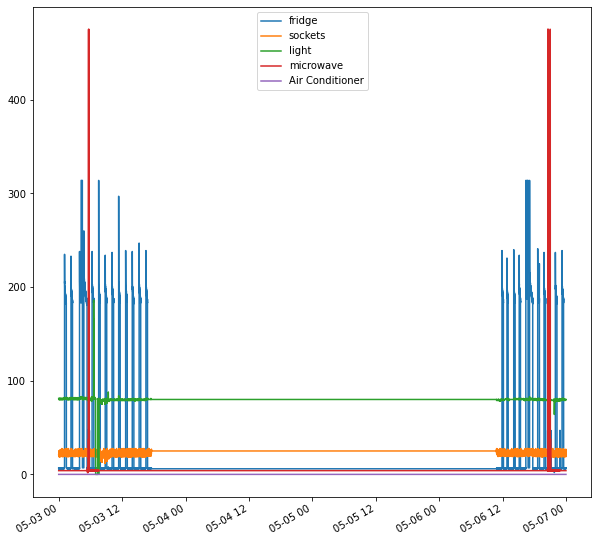

In [9]:
df_fin.loc['2011-05-03 00:00:00': '2011-05-07 00:00:00'].plot()

In [10]:
# Select appropriate dates

df_fin = pd.concat([df_fin.loc[:'2011-05-02 23:57:00'], df_fin.loc['2011-05-07 00:00:00':]], axis = 0)

# df_fin

df_fin.index = pd.date_range(start = '2011-04-18 09:22:12-04:00', periods= 929428, freq = '3S')

df_fin

,fridge,sockets,light,microwave,Air Conditioner
2011-04-18 09:22:12-04:00,6.0,27.572454,81.0,5.0,0.0
2011-04-18 09:22:15-04:00,6.0,27.572454,81.0,5.0,0.0
2011-04-18 09:22:18-04:00,6.0,27.572454,81.0,5.0,0.0
2011-04-18 09:22:21-04:00,6.0,27.572454,81.0,5.0,0.0
2011-04-18 09:22:24-04:00,6.0,27.572454,81.0,5.0,0.0
...,...,...,...,...,...
2011-05-20 15:53:21-04:00,186.0,26.000000,2.0,4.0,0.0
2011-05-20 15:53:24-04:00,187.0,24.000000,2.0,4.0,0.0
2011-05-20 15:53:27-04:00,187.0,24.000000,2.0,4.0,0.0
2011-05-20 15:53:30-04:00,190.0,24.000000,2.0,4.0,0.0


In [11]:
# Training: 04-19 to 05-12
# Validation: 05-13 to 05-18

In [12]:
# One third of 24 days is defective (training)

df_fin['fridge'].loc['2011-04-27 00:00:00': '2011-05-05 00:00:00'] = 0

In [13]:
# One third of 6 days is defective (Validation)

df_fin['fridge'].loc['2011-05-15 00:00:00': '2011-05-17 00:00:00'] = 0

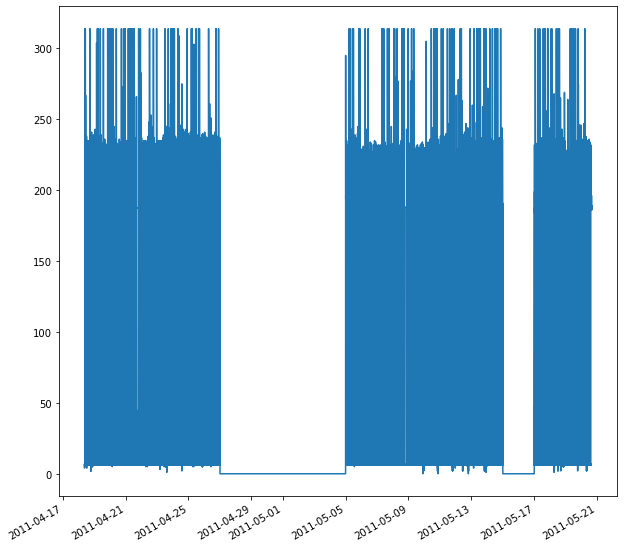

In [14]:
df_fin['fridge'].plot()

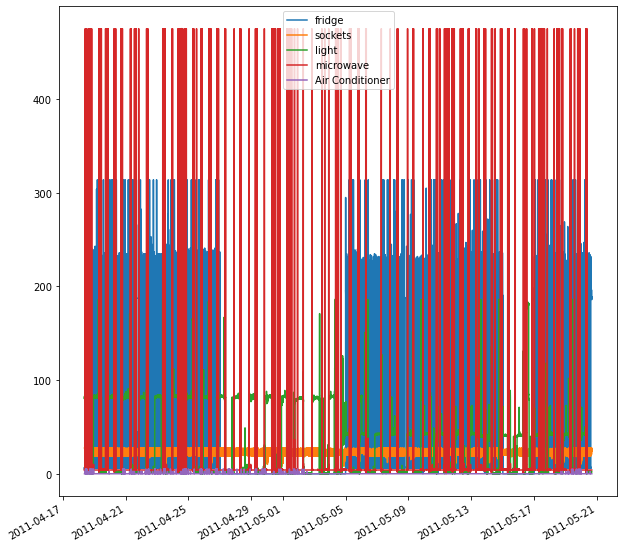

In [15]:
df_fin.plot()

In [16]:
# Generate Aggregate Column

df_fin['ALL'] = df_fin.sum(axis = 1)

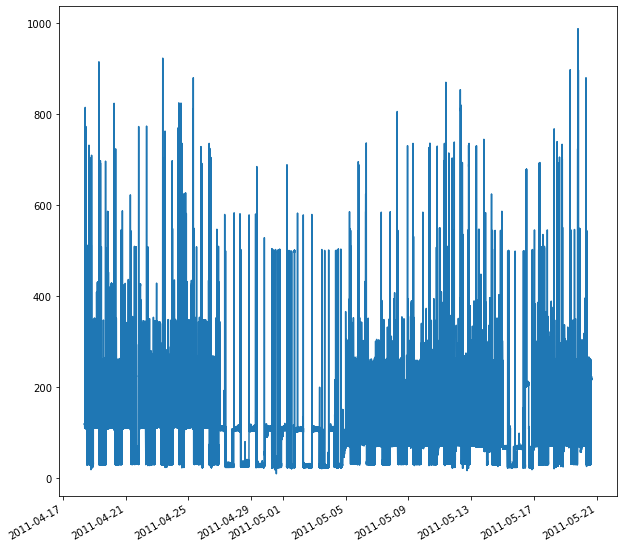

In [17]:
df_fin['ALL'].plot()

In [18]:
# Rearrange Columns

train_df = df_fin[['ALL', 'Air Conditioner', 'fridge', 'microwave', 'light', 'sockets']]

In [19]:
# Edit Time Zone Settings
# 4 hour difference

lst = list(map(lambda x: int(x.timestamp()), train_df.index))

pd.to_datetime(lst[0], unit='s', utc=True)

Timestamp('2011-04-18 13:22:12+0000', tz='UTC')

In [20]:
# Make Index Column

train_df['Index'] = lst

In [21]:
# Rearrange Columns

train_df = train_df[[list(train_df.columns)[-1]] + list(train_df.columns)[:-1]]
train_df

,Index,ALL,Air Conditioner,fridge,microwave,light,sockets
2011-04-18 09:22:12-04:00,1303132932,119.572454,0.0,6.0,5.0,81.0,27.572454
2011-04-18 09:22:15-04:00,1303132935,119.572454,0.0,6.0,5.0,81.0,27.572454
2011-04-18 09:22:18-04:00,1303132938,119.572454,0.0,6.0,5.0,81.0,27.572454
2011-04-18 09:22:21-04:00,1303132941,119.572454,0.0,6.0,5.0,81.0,27.572454
2011-04-18 09:22:24-04:00,1303132944,119.572454,0.0,6.0,5.0,81.0,27.572454
...,...,...,...,...,...,...,...
2011-05-20 15:53:21-04:00,1305921201,218.000000,0.0,186.0,4.0,2.0,26.000000
2011-05-20 15:53:24-04:00,1305921204,217.000000,0.0,187.0,4.0,2.0,24.000000
2011-05-20 15:53:27-04:00,1305921207,217.000000,0.0,187.0,4.0,2.0,24.000000
2011-05-20 15:53:30-04:00,1305921210,220.000000,0.0,190.0,4.0,2.0,24.000000


In [22]:
# Save each column to dat file.

# indices = [1, 2, 3, 4, 5, 6]

# for i in indices:
#     train_df.iloc[:, [0, i]].to_csv(f'channel_{i}.dat', sep = ' ', index = None, header = None)

In [64]:
train_df2 = train_df.loc['2011-04-19 00:00:00': '2011-05-12 23:59:57']

In [68]:
val_df2 = train_df.loc['2011-05-13 00:00:00':]

In [71]:
train_df2.columns = ['TimeStamp', 'MAIN', 'AIRCON', 'FRIDGE', 'MICROWAVE', 'LIGHT', 'SOCKETS']

In [72]:
val_df2.columns = ['TimeStamp', 'MAIN', 'AIRCON', 'FRIDGE', 'MICROWAVE', 'LIGHT', 'SOCKETS']

In [100]:
train_df2.describe().loc['max'][1:]

MAIN         922.434965
AIRCON         5.131889
FRIDGE       313.935081
MICROWAVE    475.296888
LIGHT        186.138077
SOCKETS       27.572454
Name: max, dtype: float64

In [101]:
val_df2.describe().loc['max'][1:]

MAIN         987.231970
AIRCON         5.131889
FRIDGE       313.935081
MICROWAVE    475.296888
LIGHT        186.138077
SOCKETS       27.572454
Name: max, dtype: float64

In [80]:
train_df2

,TimeStamp,MAIN,AIRCON,FRIDGE,MICROWAVE,LIGHT,SOCKETS
2011-04-19 00:00:00-04:00,1303185600,112.0,0.0,7.0,4.0,82.0,19.0
2011-04-19 00:00:03-04:00,1303185603,114.0,0.0,7.0,4.0,82.0,21.0
2011-04-19 00:00:06-04:00,1303185606,116.0,0.0,7.0,4.0,81.0,24.0
2011-04-19 00:00:09-04:00,1303185609,116.0,0.0,7.0,4.0,81.0,24.0
2011-04-19 00:00:12-04:00,1303185612,116.0,0.0,7.0,4.0,81.0,24.0
...,...,...,...,...,...,...,...
2011-05-12 23:59:45-04:00,1305259185,260.0,0.0,192.0,4.0,43.0,21.0
2011-05-12 23:59:48-04:00,1305259188,263.0,0.0,195.0,4.0,43.0,21.0
2011-05-12 23:59:51-04:00,1305259191,268.0,0.0,197.0,4.0,44.0,23.0
2011-05-12 23:59:54-04:00,1305259194,268.0,0.0,197.0,4.0,44.0,23.0


In [74]:
val_df2

,TimeStamp,MAIN,AIRCON,FRIDGE,MICROWAVE,LIGHT,SOCKETS
2011-05-13 00:00:00-04:00,1305259200,260.0,0.0,192.0,4.0,43.0,21.0
2011-05-13 00:00:03-04:00,1305259203,261.0,0.0,194.0,4.0,43.0,20.0
2011-05-13 00:00:06-04:00,1305259206,262.0,0.0,192.0,4.0,43.0,23.0
2011-05-13 00:00:09-04:00,1305259209,262.0,0.0,192.0,4.0,44.0,22.0
2011-05-13 00:00:12-04:00,1305259212,260.0,0.0,192.0,4.0,43.0,21.0
...,...,...,...,...,...,...,...
2011-05-20 15:53:21-04:00,1305921201,218.0,0.0,186.0,4.0,2.0,26.0
2011-05-20 15:53:24-04:00,1305921204,217.0,0.0,187.0,4.0,2.0,24.0
2011-05-20 15:53:27-04:00,1305921207,217.0,0.0,187.0,4.0,2.0,24.0
2011-05-20 15:53:30-04:00,1305921210,220.0,0.0,190.0,4.0,2.0,24.0


In [107]:
train_df2.to_csv('REDD_modified_train.csv', index = None)

In [108]:
val_df2.to_csv('REDD_modified_val.csv', index = None)

# Test

In [23]:
# Building 4 for each load appliance

cols = ['Sockets1', 'Sockets2', 'Light1', 'Light2', 'Unknown']
indices = [5, 14, 3, 13, 11]
counter = 0

df2 = []

for counter in range(len(cols)):
    df = next(train_elec4.select(instance = indices[counter]).load())
    df.columns = [cols[counter]]
    df.dropna()
    df2.append(df)

df2_fin = df2[0]

for df in df2[1:]:
    df2_fin = df2_fin.merge(df, how = 'inner', left_index = True, right_index = True)

df2_fin

Loading data for meter ElecMeterID(instance=5, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=3, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=13, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=4, dataset='REDD')     
Done loading data all meters for this chunk.


,Sockets1,Sockets2,Light1,Light2,Unknown
2011-04-16 21:16:30-04:00,1.0,139.0,243.0,51.0,2.0
2011-04-16 21:16:33-04:00,0.0,138.0,244.0,51.0,1.0
2011-04-16 21:16:36-04:00,1.0,140.0,243.0,51.0,2.0
2011-04-16 21:16:39-04:00,1.0,140.0,243.0,51.0,2.0
2011-04-16 21:16:42-04:00,1.0,139.0,241.0,51.0,2.0
...,...,...,...,...,...
2011-06-03 20:45:24-04:00,34.0,135.0,178.0,25.0,2.0
2011-06-03 20:45:27-04:00,36.0,135.0,177.0,26.0,2.0
2011-06-03 20:45:30-04:00,38.0,135.0,173.0,25.0,1.0
2011-06-03 20:45:33-04:00,34.0,135.0,174.0,25.0,1.0


In [24]:
# Building 3 for each load appliance

cols = ['Fridge', 'Microwave']
indices = [7, 16]
counter = 0

df3 = []

for counter in range(len(cols)):
    df = next(train_elec3.select(instance = indices[counter]).load())
    df.columns = [cols[counter]]
    df.dropna()
    df3.append(df)

df3_fin = df3[0]

for df in df3[1:]:
    df3_fin = df3_fin.merge(df, how = 'inner', left_index = True, right_index = True)

df3_fin

Loading data for meter ElecMeterID(instance=7, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=16, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


,Fridge,Microwave
2011-04-16 01:11:30-04:00,119.0,2.0
2011-04-16 01:11:33-04:00,118.0,2.0
2011-04-16 01:11:36-04:00,119.0,2.0
2011-04-16 01:11:39-04:00,119.0,2.0
2011-04-16 01:11:42-04:00,117.0,2.0
...,...,...
2011-05-30 20:19:21-04:00,8.0,1.0
2011-05-30 20:19:24-04:00,8.0,2.0
2011-05-30 20:19:27-04:00,8.0,2.0
2011-05-30 20:19:30-04:00,8.0,2.0


In [25]:
# Merge Appliances from different buildings

df4_fin = df2_fin.merge(df3_fin, how = 'inner', left_index = True, right_index = True)
df4_fin = df4_fin.merge(air_con, how = 'inner', left_index = True, right_index = True)

In [26]:
# Generate Artifical Loads

df4_fin['Sockets'] = df4_fin['Sockets1'] + df4_fin['Sockets2']
df4_fin['Light'] = df4_fin['Light1'] + df4_fin['Light2']
df4_fin['Fridge'] = df4_fin['Fridge'] * 2
df4_fin['Microwave'] = df4_fin['Microwave'] * 2

df4_fin = df4_fin.drop(['Sockets1', 'Sockets2', 'Light1', 'Light2'], axis = 1)
df4_fin

,Unknown,Fridge,Microwave,Air Conditioner,Sockets,Light
2011-04-16 21:16:30-04:00,2.0,2.0,4.0,0.0,140.0,294.0
2011-04-16 21:16:33-04:00,1.0,2.0,4.0,0.0,138.0,295.0
2011-04-16 21:16:36-04:00,2.0,2.0,4.0,0.0,141.0,294.0
2011-04-16 21:16:39-04:00,2.0,0.0,4.0,0.0,141.0,294.0
2011-04-16 21:16:42-04:00,2.0,0.0,4.0,0.0,140.0,292.0
...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,1.0,16.0,2.0,0.0,7.0,25.0
2011-05-30 20:19:24-04:00,1.0,16.0,4.0,0.0,6.0,24.0
2011-05-30 20:19:27-04:00,1.0,16.0,4.0,0.0,6.0,24.0
2011-05-30 20:19:30-04:00,1.0,16.0,4.0,0.0,8.0,24.0


In [27]:
# Drop NA Values (If present)

df4_fin = df4_fin.dropna()

In [28]:
# Ensure observations within 3 

for col in df4_fin.columns:
    df4_fin[col] = within_three_std(df4_fin[col])

1.9189063012599945
497.33473205566406
394.0849199295044
4.962656602263451
246.1154556274414
167.22701263427734


In [29]:
# df4_fin.plot()

In [30]:
df4_fin['ALL'] = df4_fin.sum(axis = 1)

In [31]:
# df4_fin['ALL'].plot()

In [32]:
df4_fin

,Unknown,Fridge,Microwave,Air Conditioner,Sockets,Light,ALL
2011-04-16 21:16:30-04:00,1.918906,2.0,4.0,0.0,140.0,167.227013,315.145919
2011-04-16 21:16:33-04:00,1.000000,2.0,4.0,0.0,138.0,167.227013,312.227013
2011-04-16 21:16:36-04:00,1.918906,2.0,4.0,0.0,141.0,167.227013,316.145919
2011-04-16 21:16:39-04:00,1.918906,0.0,4.0,0.0,141.0,167.227013,314.145919
2011-04-16 21:16:42-04:00,1.918906,0.0,4.0,0.0,140.0,167.227013,313.145919
...,...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,1.000000,16.0,2.0,0.0,7.0,25.000000,51.000000
2011-05-30 20:19:24-04:00,1.000000,16.0,4.0,0.0,6.0,24.000000,51.000000
2011-05-30 20:19:27-04:00,1.000000,16.0,4.0,0.0,6.0,24.000000,51.000000
2011-05-30 20:19:30-04:00,1.000000,16.0,4.0,0.0,8.0,24.000000,53.000000


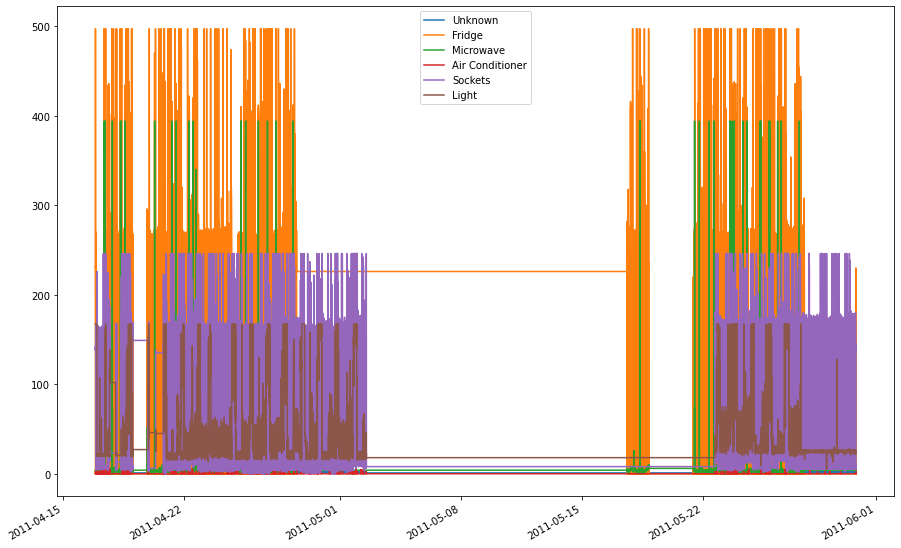

In [33]:
df4_fin.drop(['ALL'], axis = 1).plot(figsize = (15, 10))

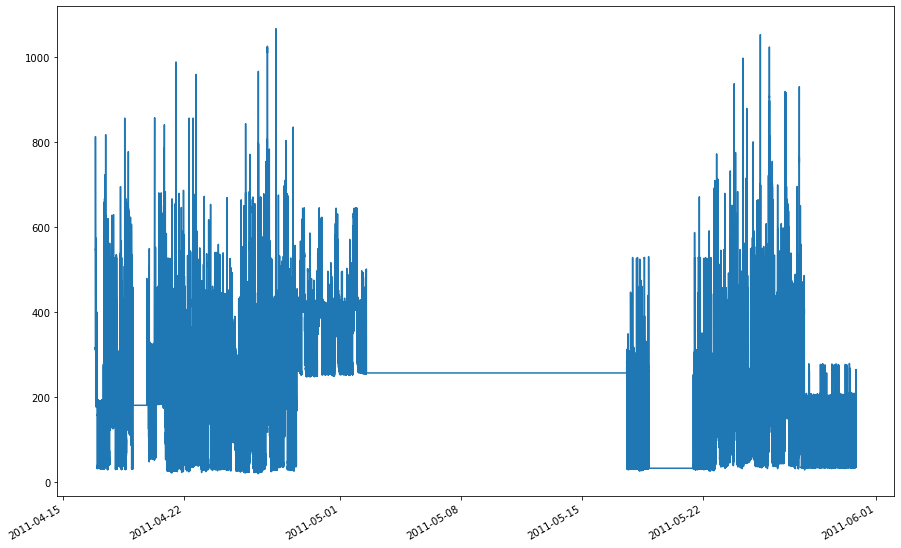

In [34]:
df4_fin['ALL'].plot(figsize = (15, 10))

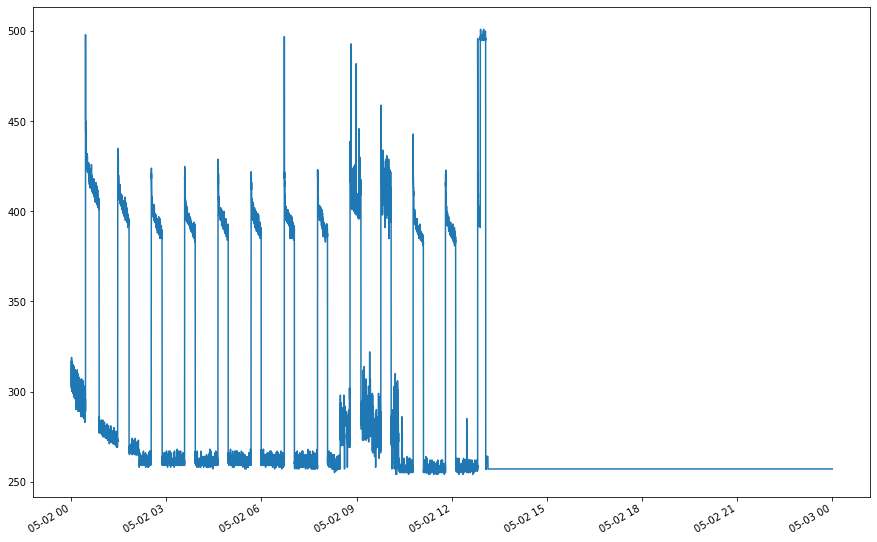

In [35]:
df4_fin['ALL'].loc['2011-05-02 00:00': '2011-05-03 00:00'].plot(figsize = (15, 10))

In [36]:
# End: '2011-05-03 00:00'

In [37]:
# df4_fin['ALL'].loc['2011-05-21 00:00': '2011-05-22 00:00'].plot(figsize = (15, 10))

In [38]:
test_df = df4_fin[['ALL', 'Air Conditioner', 'Fridge', 'Microwave', 'Light', 'Sockets', 'Unknown']]

In [39]:
test_df.index[0]

Timestamp('2011-04-16 21:16:30-0400', tz='US/Eastern', freq='3S')

In [40]:
test_df.index[-1]

Timestamp('2011-05-30 20:19:33-0400', tz='US/Eastern', freq='3S')

In [41]:
# 4 hour difference

lst = list(map(lambda x: int(x.timestamp()), test_df.index))

pd.to_datetime(lst[0], unit='s', utc=True)

Timestamp('2011-04-17 01:16:30+0000', tz='UTC')

In [42]:
pd.to_datetime(lst[-1], unit='s', utc=True)

Timestamp('2011-05-31 00:19:33+0000', tz='UTC')

In [43]:
test_df['Index'] = lst

In [44]:
test_df = test_df[[list(test_df.columns)[-1]] + list(test_df.columns)[:-1]]
test_df

,Index,ALL,Air Conditioner,Fridge,Microwave,Light,Sockets,Unknown
2011-04-16 21:16:30-04:00,1303002990,315.145919,0.0,2.0,4.0,167.227013,140.0,1.918906
2011-04-16 21:16:33-04:00,1303002993,312.227013,0.0,2.0,4.0,167.227013,138.0,1.000000
2011-04-16 21:16:36-04:00,1303002996,316.145919,0.0,2.0,4.0,167.227013,141.0,1.918906
2011-04-16 21:16:39-04:00,1303002999,314.145919,0.0,0.0,4.0,167.227013,141.0,1.918906
2011-04-16 21:16:42-04:00,1303003002,313.145919,0.0,0.0,4.0,167.227013,140.0,1.918906
...,...,...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,1306801161,51.000000,0.0,16.0,2.0,25.000000,7.0,1.000000
2011-05-30 20:19:24-04:00,1306801164,51.000000,0.0,16.0,4.0,24.000000,6.0,1.000000
2011-05-30 20:19:27-04:00,1306801167,51.000000,0.0,16.0,4.0,24.000000,6.0,1.000000
2011-05-30 20:19:30-04:00,1306801170,53.000000,0.0,16.0,4.0,24.000000,8.0,1.000000


In [45]:
# indices = [1, 2, 3, 4, 5, 6, 7]

# for i in indices:
#     test_df.iloc[:, [0, i]].to_csv(f'channel_{i}.dat', sep = ' ', index = None, header = None)

In [46]:
test_df2 = test_df.copy()

In [47]:
# 23rd to 25th defective

test_df2['Fridge'].loc['2011-04-23 00:00:00': '2011-04-26 00:00:00'] = 0

In [48]:
test_df2['Fridge'].loc['2011-04-22 23:57:57': '2011-04-26 00:03:00']

2011-04-22 23:57:57-04:00    238.0
2011-04-22 23:58:00-04:00    234.0
2011-04-22 23:58:03-04:00    238.0
2011-04-22 23:58:06-04:00    236.0
2011-04-22 23:58:09-04:00    236.0
                             ...  
2011-04-26 00:02:48-04:00      0.0
2011-04-26 00:02:51-04:00      0.0
2011-04-26 00:02:54-04:00      0.0
2011-04-26 00:02:57-04:00      0.0
2011-04-26 00:03:00-04:00      2.0
Freq: 3S, Name: Fridge, Length: 86502, dtype: float64

In [49]:
test_df2 = test_df2.drop(['Index', 'ALL'], axis = 1)

In [50]:
test_df2['ALL'] = test_df2.sum(axis = 1)
test_df2

,Air Conditioner,Fridge,Microwave,Light,Sockets,Unknown,ALL
2011-04-16 21:16:30-04:00,0.0,2.0,4.0,167.227013,140.0,1.918906,315.145919
2011-04-16 21:16:33-04:00,0.0,2.0,4.0,167.227013,138.0,1.000000,312.227013
2011-04-16 21:16:36-04:00,0.0,2.0,4.0,167.227013,141.0,1.918906,316.145919
2011-04-16 21:16:39-04:00,0.0,0.0,4.0,167.227013,141.0,1.918906,314.145919
2011-04-16 21:16:42-04:00,0.0,0.0,4.0,167.227013,140.0,1.918906,313.145919
...,...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,0.0,16.0,2.0,25.000000,7.0,1.000000,51.000000
2011-05-30 20:19:24-04:00,0.0,16.0,4.0,24.000000,6.0,1.000000,51.000000
2011-05-30 20:19:27-04:00,0.0,16.0,4.0,24.000000,6.0,1.000000,51.000000
2011-05-30 20:19:30-04:00,0.0,16.0,4.0,24.000000,8.0,1.000000,53.000000


In [51]:
test_df2['Index'] = test_df['Index']
test_df2

,Air Conditioner,Fridge,Microwave,Light,Sockets,Unknown,ALL,Index
2011-04-16 21:16:30-04:00,0.0,2.0,4.0,167.227013,140.0,1.918906,315.145919,1303002990
2011-04-16 21:16:33-04:00,0.0,2.0,4.0,167.227013,138.0,1.000000,312.227013,1303002993
2011-04-16 21:16:36-04:00,0.0,2.0,4.0,167.227013,141.0,1.918906,316.145919,1303002996
2011-04-16 21:16:39-04:00,0.0,0.0,4.0,167.227013,141.0,1.918906,314.145919,1303002999
2011-04-16 21:16:42-04:00,0.0,0.0,4.0,167.227013,140.0,1.918906,313.145919,1303003002
...,...,...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,0.0,16.0,2.0,25.000000,7.0,1.000000,51.000000,1306801161
2011-05-30 20:19:24-04:00,0.0,16.0,4.0,24.000000,6.0,1.000000,51.000000,1306801164
2011-05-30 20:19:27-04:00,0.0,16.0,4.0,24.000000,6.0,1.000000,51.000000,1306801167
2011-05-30 20:19:30-04:00,0.0,16.0,4.0,24.000000,8.0,1.000000,53.000000,1306801170


In [52]:
temp = list(test_df.columns)

In [53]:
# Without Fridge

test_df2 = test_df2[temp]
test_df2

,Index,ALL,Air Conditioner,Fridge,Microwave,Light,Sockets,Unknown
2011-04-16 21:16:30-04:00,1303002990,315.145919,0.0,2.0,4.0,167.227013,140.0,1.918906
2011-04-16 21:16:33-04:00,1303002993,312.227013,0.0,2.0,4.0,167.227013,138.0,1.000000
2011-04-16 21:16:36-04:00,1303002996,316.145919,0.0,2.0,4.0,167.227013,141.0,1.918906
2011-04-16 21:16:39-04:00,1303002999,314.145919,0.0,0.0,4.0,167.227013,141.0,1.918906
2011-04-16 21:16:42-04:00,1303003002,313.145919,0.0,0.0,4.0,167.227013,140.0,1.918906
...,...,...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,1306801161,51.000000,0.0,16.0,2.0,25.000000,7.0,1.000000
2011-05-30 20:19:24-04:00,1306801164,51.000000,0.0,16.0,4.0,24.000000,6.0,1.000000
2011-05-30 20:19:27-04:00,1306801167,51.000000,0.0,16.0,4.0,24.000000,6.0,1.000000
2011-05-30 20:19:30-04:00,1306801170,53.000000,0.0,16.0,4.0,24.000000,8.0,1.000000


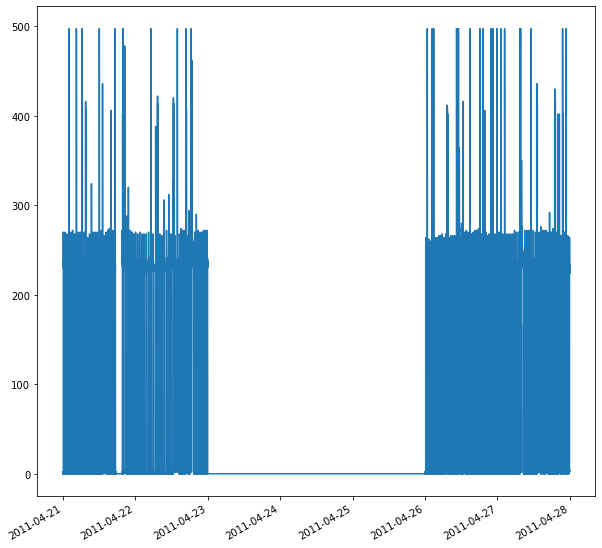

In [54]:
test_df2['Fridge'].loc['2011-04-21 00:00:00': '2011-04-28 00:00:00'].plot()

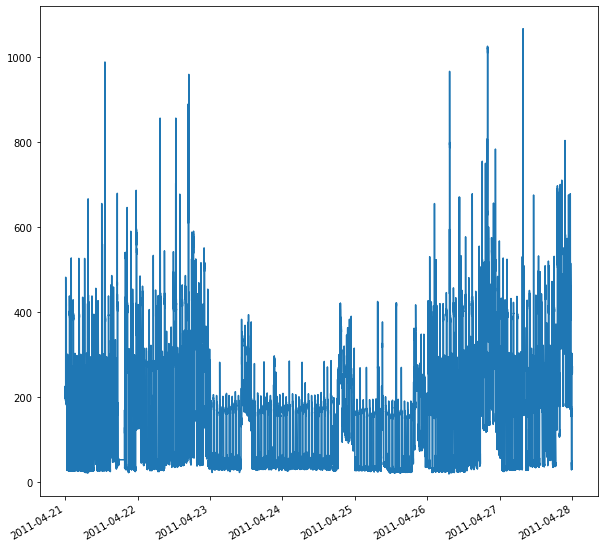

In [55]:
test_df2['ALL'].loc['2011-04-21 00:00:00': '2011-04-28 00:00:00'].plot()

In [82]:
test_df3 = test_df2.copy()

In [86]:
test_df3 = test_df3.drop(['Unknown'], axis = 1)

In [88]:
test_df3.columns = train_df2.columns

In [89]:
test_df3

,TimeStamp,MAIN,AIRCON,FRIDGE,MICROWAVE,LIGHT,SOCKETS
2011-04-16 21:16:30-04:00,1303002990,315.145919,0.0,2.0,4.0,167.227013,140.0
2011-04-16 21:16:33-04:00,1303002993,312.227013,0.0,2.0,4.0,167.227013,138.0
2011-04-16 21:16:36-04:00,1303002996,316.145919,0.0,2.0,4.0,167.227013,141.0
2011-04-16 21:16:39-04:00,1303002999,314.145919,0.0,0.0,4.0,167.227013,141.0
2011-04-16 21:16:42-04:00,1303003002,313.145919,0.0,0.0,4.0,167.227013,140.0
...,...,...,...,...,...,...,...
2011-05-30 20:19:21-04:00,1306801161,51.000000,0.0,16.0,2.0,25.000000,7.0
2011-05-30 20:19:24-04:00,1306801164,51.000000,0.0,16.0,4.0,24.000000,6.0
2011-05-30 20:19:27-04:00,1306801167,51.000000,0.0,16.0,4.0,24.000000,6.0
2011-05-30 20:19:30-04:00,1306801170,53.000000,0.0,16.0,4.0,24.000000,8.0


In [99]:
test_df3.describe().loc['max'][1:]

MAIN         1066.419652
AIRCON          4.962657
FRIDGE        497.334732
MICROWAVE     394.084920
LIGHT         167.227013
SOCKETS       246.115456
Name: max, dtype: float64

In [116]:
test_df3.loc['2011-04-21 00:00:00': '2011-04-28 00:00:00'].to_csv('REDD_modified_test.csv', index = None)

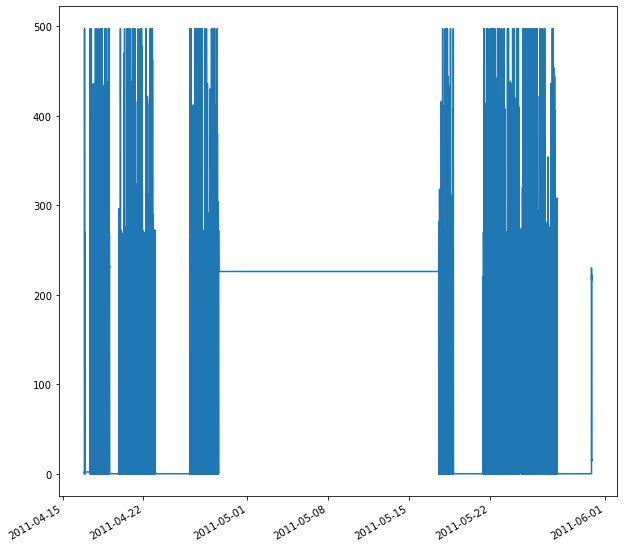

In [115]:
test_df3['FRIDGE'].plot()

In [56]:
# indices = [1, 3]

# for i in indices:
#     test_df2.iloc[:, [0, i]].to_csv(f'channel_{i}.dat', sep = ' ', index = None, header = None)

# Generate h5 files

In [57]:
# import nilmtk.dataset_converters.redd.convert_redd as redd

In [58]:
# redd_path = "C:\\Users\\CGH\\Documents\\Github\\commercial-nilm\\ukdale_redd\\redd_data"
# output_filename = "C:\\Users\\CGH\\Documents\\Github\\commercial-nilm\\ukdale_redd\\Simulated Defective Fridge\\redd3.h5"
# redd.convert_redd(redd_path, output_filename, format='HDF')

In [59]:
# import tables
# tables.file._open_files.close_all()